# Context specific network analysis
This is a short single-notebook tutorial for context specific gene regulatory network analysis. For extra details, see other notebooks in the same folder.
## Configuration

In [1]:
# Download network data from zenodo
!cd ../.. && dictys_helper repodown.sh zenodo analysis-blood.tar.xz


## Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dictys
from dictys.net import network
d0=network.from_file('../../data/static.h5')


## Regulation marker TF discovery with dot plot ([global-dotplot.ipynb](global-dotplot.ipynb))

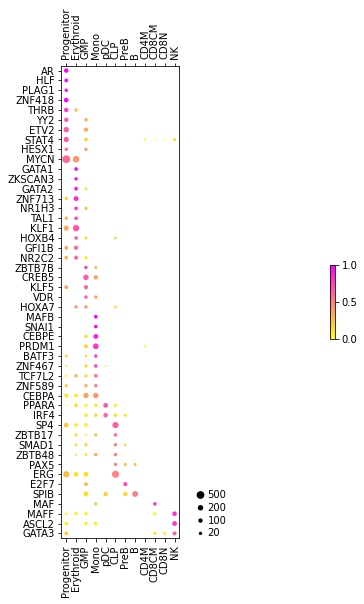

In [3]:
from dictys.plot.static import compute_reg_spec,fig_heatmap_reg_spec
from dictys.plot import dotplot,heatmap

#Cell cluster/type/state names selection & ordering for marker gene detection/visualization
select_state='Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK'.split(',')
#Compute regulatory activity, expression, and their specificity for TFs
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0,select_state=select_state)

#Color map
cmap='spring_r'
#Node sizes to draw legend in dot plot for regulation
node_size_target=[20,100,200,500]
#Transformation from target count to node size for regulation
node_size_map_target=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Draw dot plot with top regulation marker genes
fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
#Top labels
ax.tick_params(top=True,labeltop=True)


The same dot plot on expression level and expression specificity for the same regulation marker genes

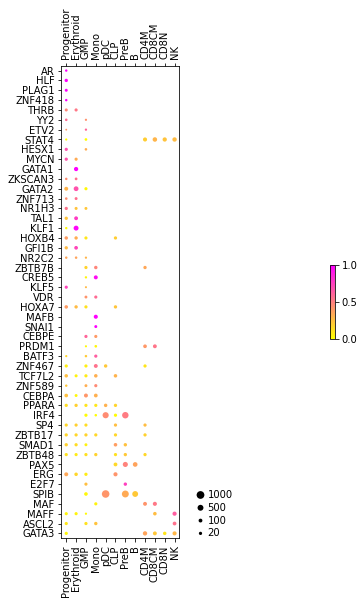

In [4]:
#Node sizes to draw legend in dot plot for expression (CPM)
node_size_cpm=[20,100,500,1000]
#Transformation from target count to node size for regulation
node_size_map_cpm=lambda x:x*(x<=10)+(10+(x-10)*1000/20/990)*(x>10)

#Draw dot plot of expression level and expression specificity with top regulation marker genes
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Heatmap of regulation strengths between select TFs and their top targets in select cell types ([global-heatmap.ipynb](global-heatmap.ipynb))

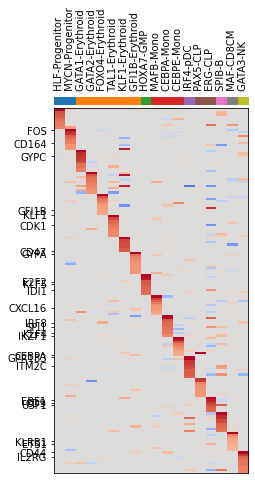

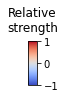

In [5]:
from dictys.plot.static import fig_heatmap_top

#TF-cell type pairs to draw
tf=[('HLF','Progenitor'),('MYCN','Progenitor'),('GATA1','Erythroid'),('GATA2','Erythroid'),('FOXO4','Erythroid'),('TAL1','Erythroid'),('KLF1','Erythroid'),('GFI1B','Erythroid'),('HOXA7','GMP'),('MAFB','Mono'),('CEBPA','Mono'),('CEBPE','Mono'),('IRF4','pDC'),('PAX5','CLP'),('ERG','CLP'),('SPIB','B'),('MAF','CD8CM'),('GATA3','NK')]
#Number of top targets for each TF
ntop=10
#Only activated targets (no repression)
direction=1
#Target genes to annotate
gann='FOS,CD164,GYPC,GFI1B,KLF1,CDK1,CD47,GYPA,E2F2,KLF5,CXCL16,CEBPA,IRF8,KLF4,GPR183,ITM2C,IKZF1,SPI1,USF1,EBF1,CD9,IDI1,KLRB1,ETS1,CD44,IL2RG'.split(',')

fig,fig_colorbar,net=fig_heatmap_top(d0,tf,ntop=ntop,direction=direction,gann=gann)


## Scatter plot and bar plot of differential regulation & differential expression between two cell clusters  ([pair-diff.ipynb](pair-diff.ipynb))
### Erythroids v.s. Progenitors
Scatter plot of diffferential regulation & differential expression logFCs

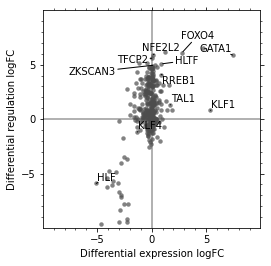

In [6]:
from dictys.plot.static import fig_diff_scatter

#Cell type/state names to compare in (reference, alternative) format
states=('Progenitor','Erythroid')
#TFs to annotate
annotate='HLF,KLF4,ZKSCAN3,TFCP2,NFE2L2,HLTF,RREB1,TAL1,KLF1,FOXO4,GATA1'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


Bar plot of logFC based ranking

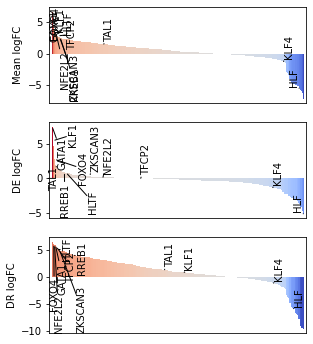

In [7]:
from dictys.plot.static import fig_diff_rank

fig=fig_diff_rank(data,annotate=annotate)


### B cells v.s. Progenitors

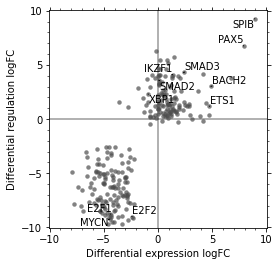

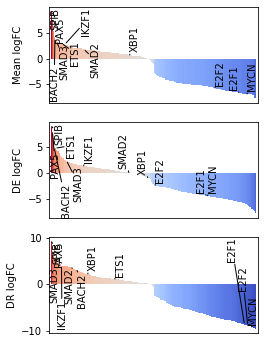

In [8]:
states=('Progenitor','B')
annotate='SPIB,PAX5,ETS1,BACH2,IKZF1,SMAD3,SMAD2,XBP1,E2F1,MYCN,E2F2'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)
fig2=fig_diff_rank(data,annotate=annotate)


## Draw target gene subnetwork of a TF ([subnet.ipynb](subnet.ipynb))
### GATA1 targets in Erythroid


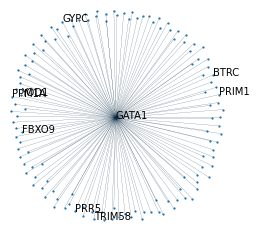

In [9]:
from dictys.plot.static import fig_subnet
#Sparsity to binarize network: this proportion of edges will be regarded as positive to draw the subnetwork. Defaults to 0.01
sparsity=0.05
#List of genes to annotate
annotate='GATA1,PRIM1,BTRC,GYPC,PPM1A,YOD1,FBXO9,PRR5,TRIM58'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Erythroid',regulators=['GATA1'],sparsity=sparsity,annotate=annotate)


### Other TFs and cell types

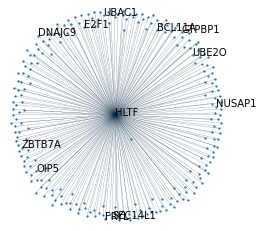

In [10]:
annotate='HLTF,BCL11A,UBAC1,DNAJC9,SEC14L1,NUSAP1,UBE2O,GTPBP1,ZBTB7A,OIP5,E2F1,FRYL'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Erythroid',regulators=['HLTF'],annotate=annotate,sparsity=sparsity)


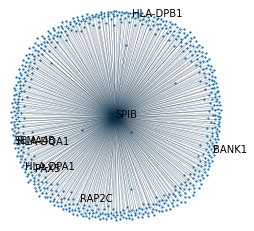

In [11]:
annotate='SPIB,RAP2C,BANK1,HLA-DQA1,HLA-DPB1,SEMA4B,HLA-DPA1,PAX5'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['SPIB'],annotate=annotate)


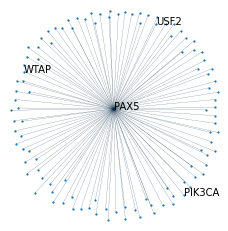

In [12]:
annotate='PAX5,USF2,WTAP,PIK3CA'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['PAX5'],annotate=annotate)


## Exporting networks to folder

In [13]:
output_folder='../../output/static'
#Choose which sparsities (proportion of positive edges) to export network
#Use None to export continuous network
sparsities=[None,0.01]
d0.export(output_folder,sparsities=sparsities)
